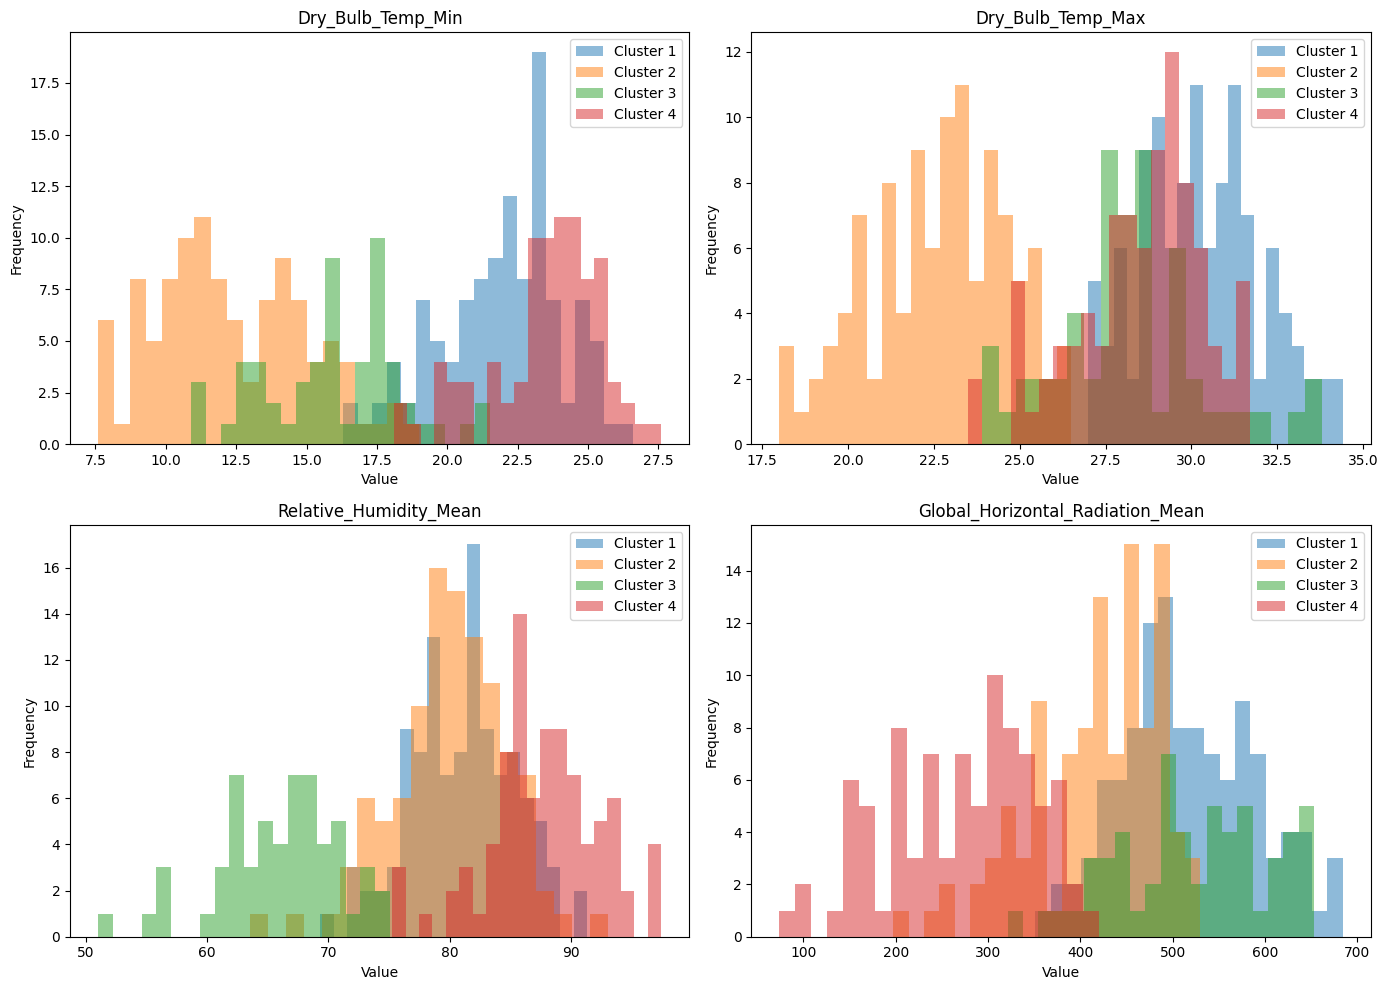

     Day  Cluster_Labels
0      1               1
1      2               1
2      3               1
3      4               1
4      5               1
..   ...             ...
360  361               1
361  362               1
362  363               1
363  364               1
364  365               1

[365 rows x 2 columns]


In [39]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi raw file trial7.xlsx"
data = pd.read_excel(file_path)

# Extract the relevant columns
data_values = data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the original data
data['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = 'C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/delhi_clustered_data.xlsx'
# data.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
cluster_counts, best_cluster_count

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])


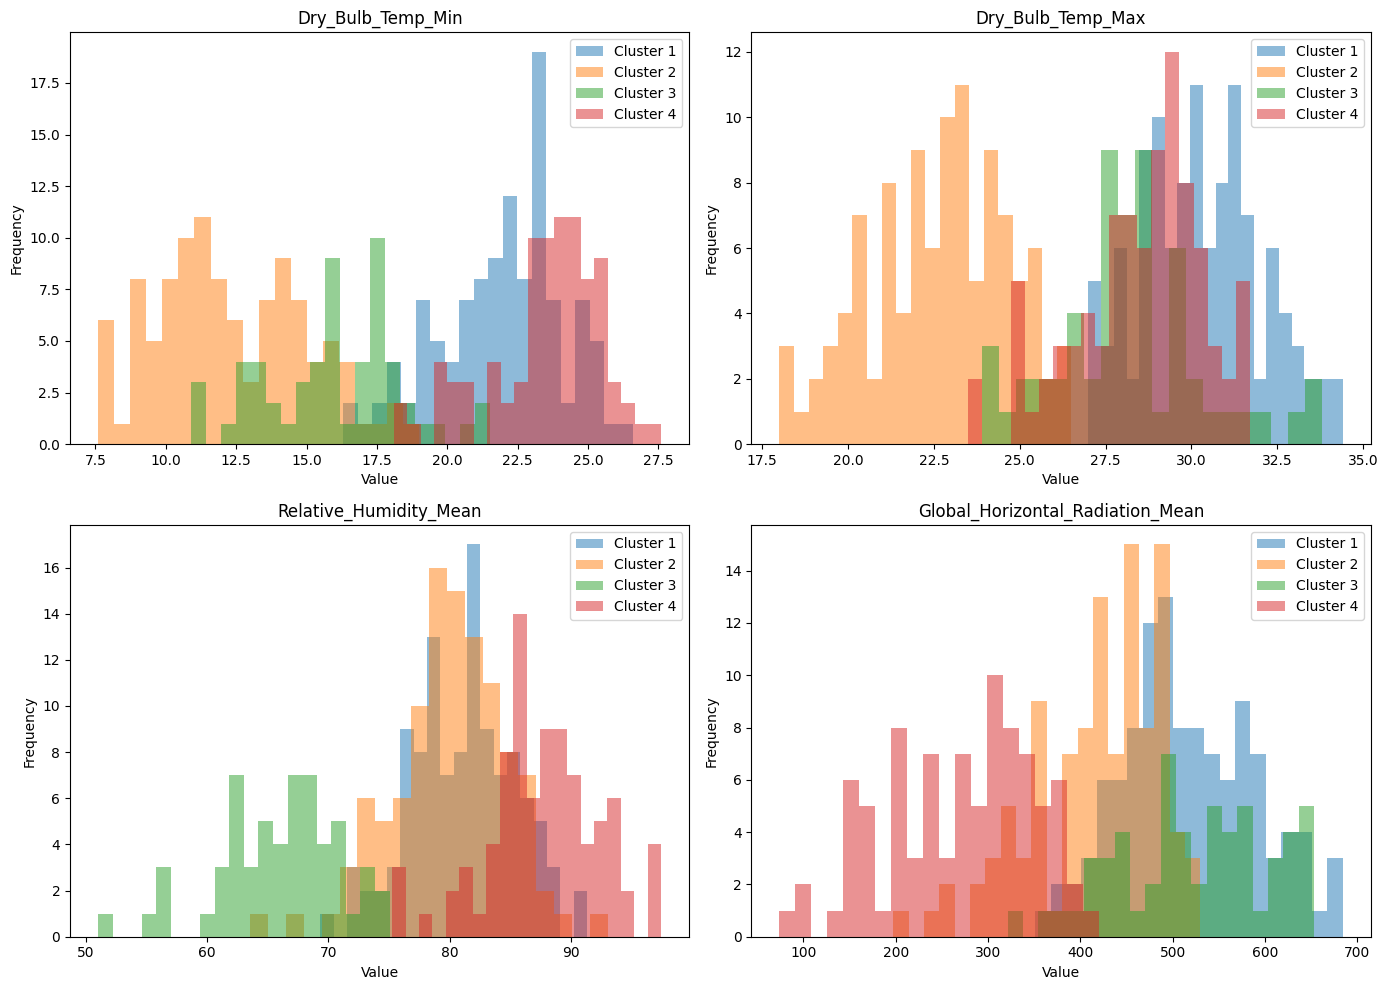

     Day  Cluster_Labels
0      1               1
1      2               1
2      3               1
3      4               1
4      5               1
..   ...             ...
360  361               1
361  362               1
362  363               1
363  364               1
364  365               1

[365 rows x 2 columns]


In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/shillong raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/shillong_clustered_data.xlsx"
# results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
cluster_counts, best_cluster_count

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])


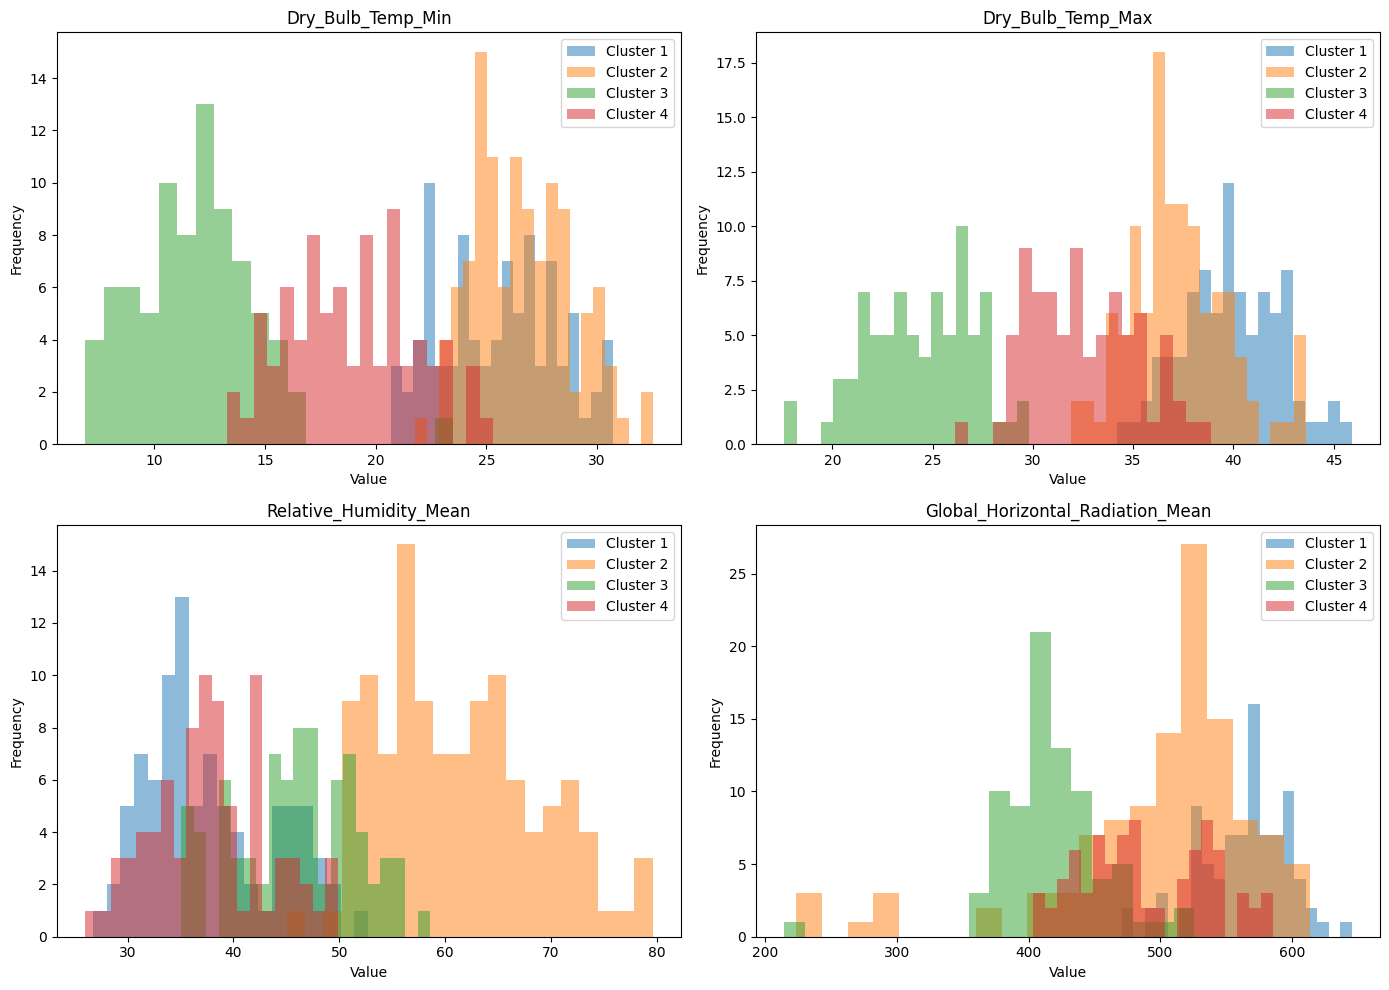

     Day  Cluster_Labels
0      1               2
1      2               2
2      3               2
3      4               2
4      5               2
..   ...             ...
360  361               2
361  362               2
362  363               2
363  364               2
364  365               2

[365 rows x 2 columns]


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/jaisalmer raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/jaisalmer_clustered_data.xlsx"
# results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
cluster_counts, best_cluster_count

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])


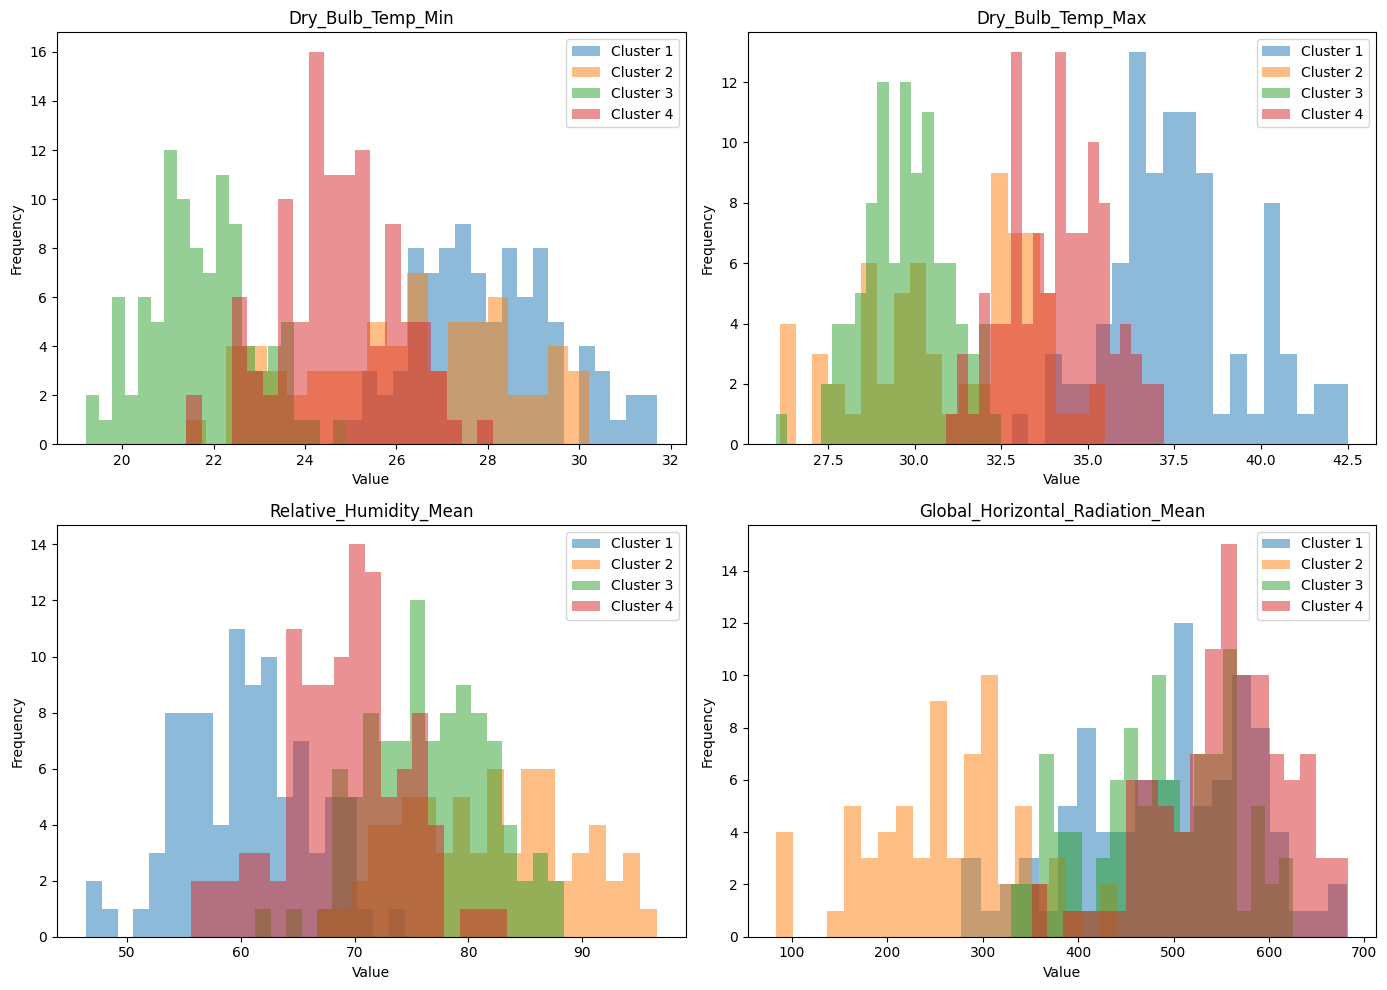

     Day  Cluster_Labels
0      1               2
1      2               2
2      3               2
3      4               2
4      5               2
..   ...             ...
360  361               2
361  362               2
362  363               2
363  364               2
364  365               2

[365 rows x 2 columns]


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Chennai raw file.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/chennai_clustered_data.xlsx"
results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
cluster_counts, best_cluster_count

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])


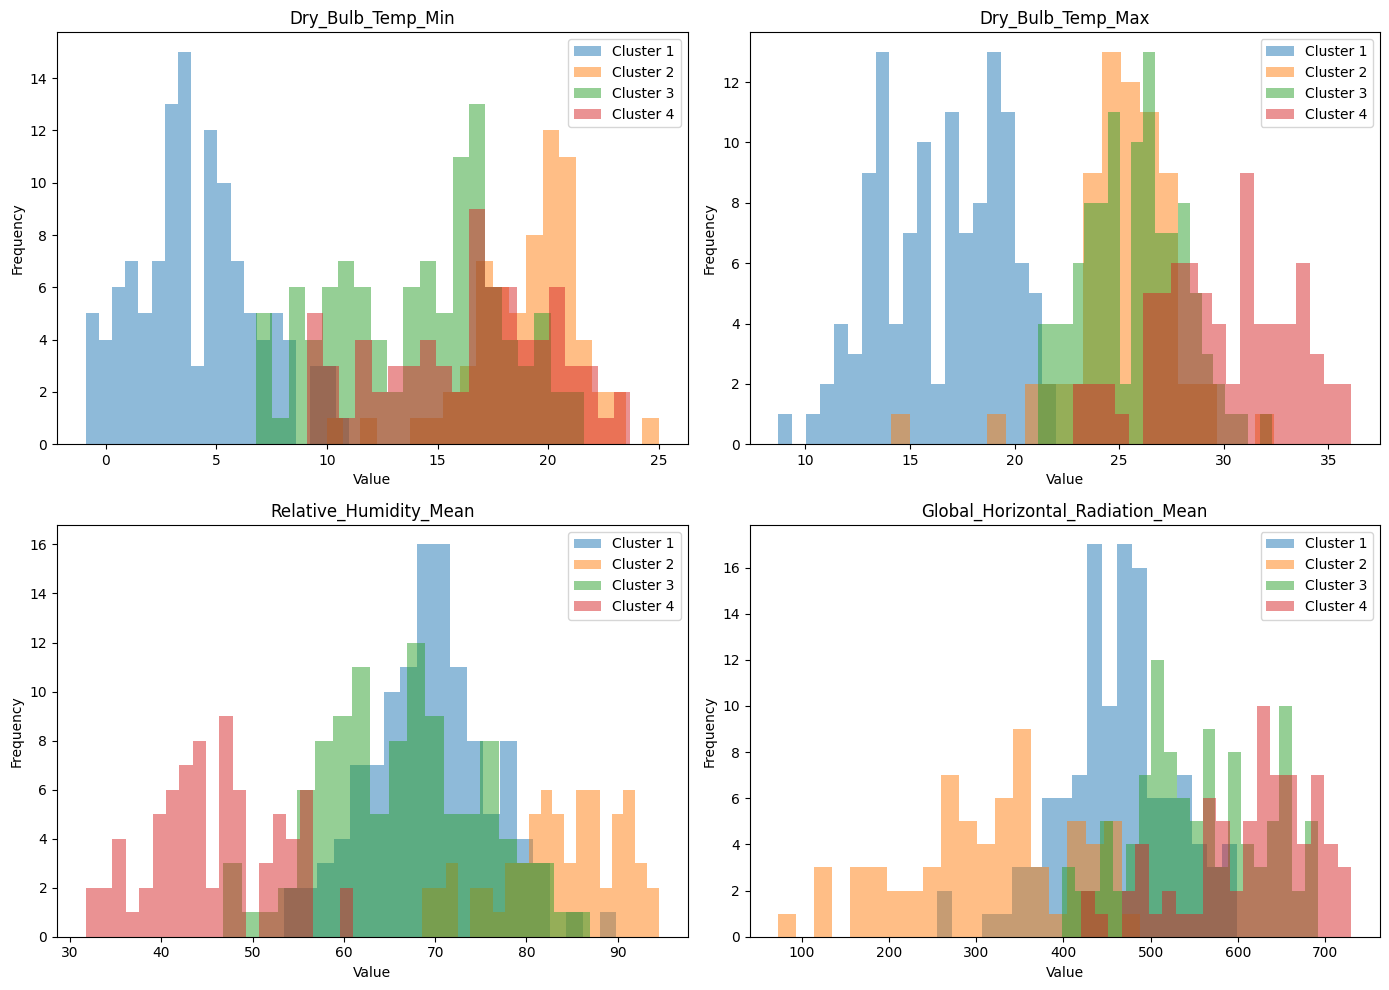

     Day  Cluster_Labels
0      1               0
1      2               0
2      3               0
3      4               0
4      5               0
..   ...             ...
360  361               0
361  362               0
362  363               0
363  364               0
364  365               0

[365 rows x 2 columns]


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/nainital raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/nainital_clustered_data.xlsx"
results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
cluster_counts, best_cluster_count

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])


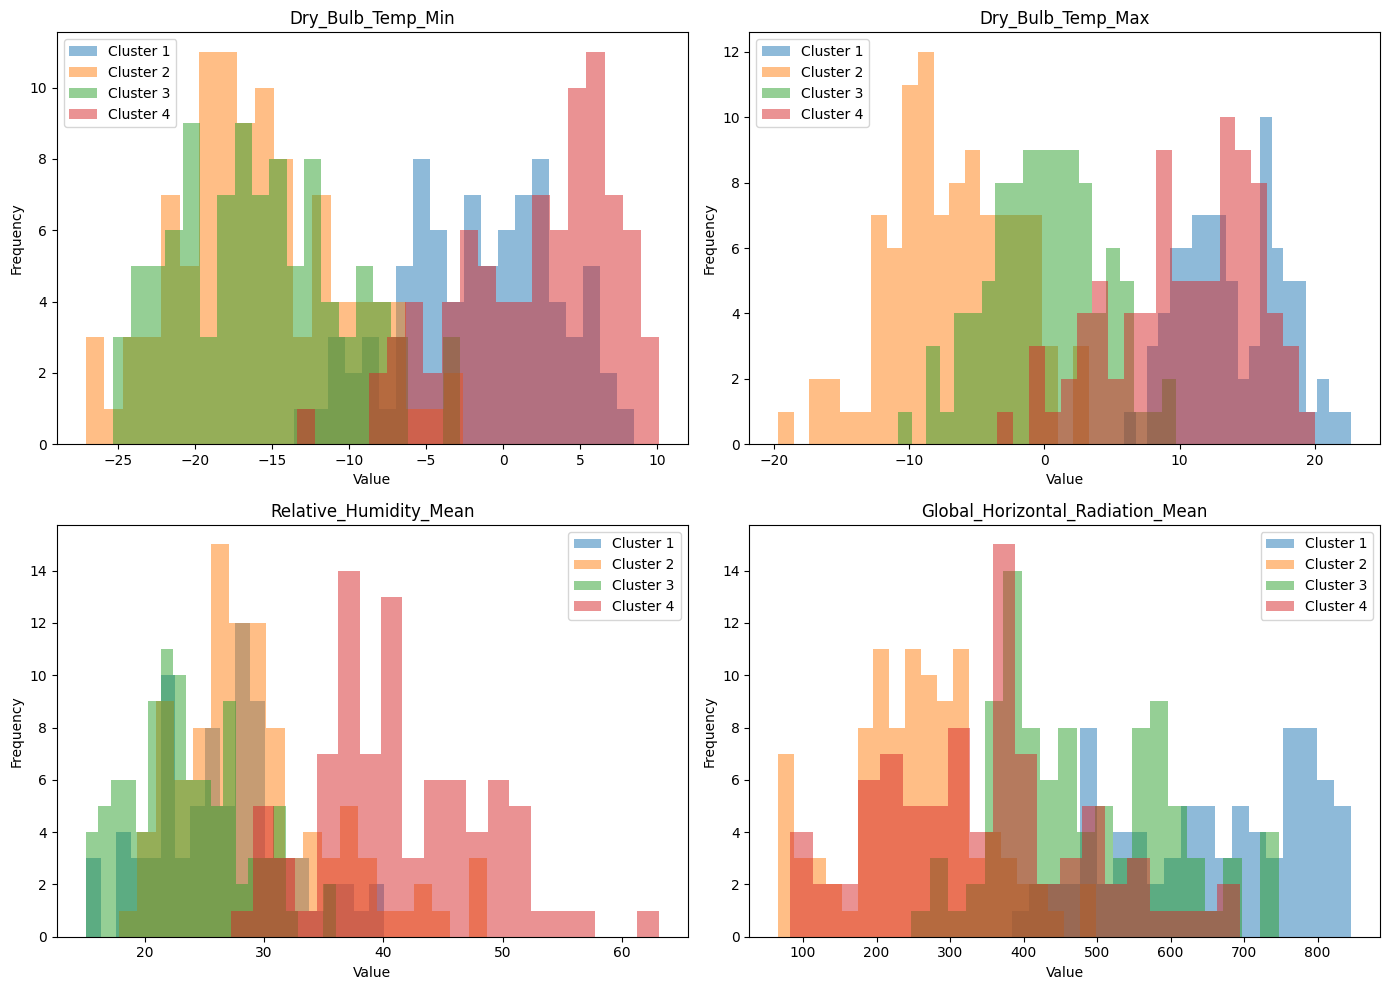

     Day  Cluster_Labels
0      1               2
1      2               1
2      3               2
3      4               2
4      5               1
..   ...             ...
360  361               1
361  362               1
362  363               1
363  364               2
364  365               1

[365 rows x 2 columns]


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/leh ladakh raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/ladakh_clustered_data.xlsx"
# results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
cluster_counts, best_cluster_count

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/hyderabad_clustered_data.xlsx"
results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
cluster_counts, best_cluster_count


(array([108,  96,  84,  77], dtype=int64), 4)

[ 96 108  84  77] 4


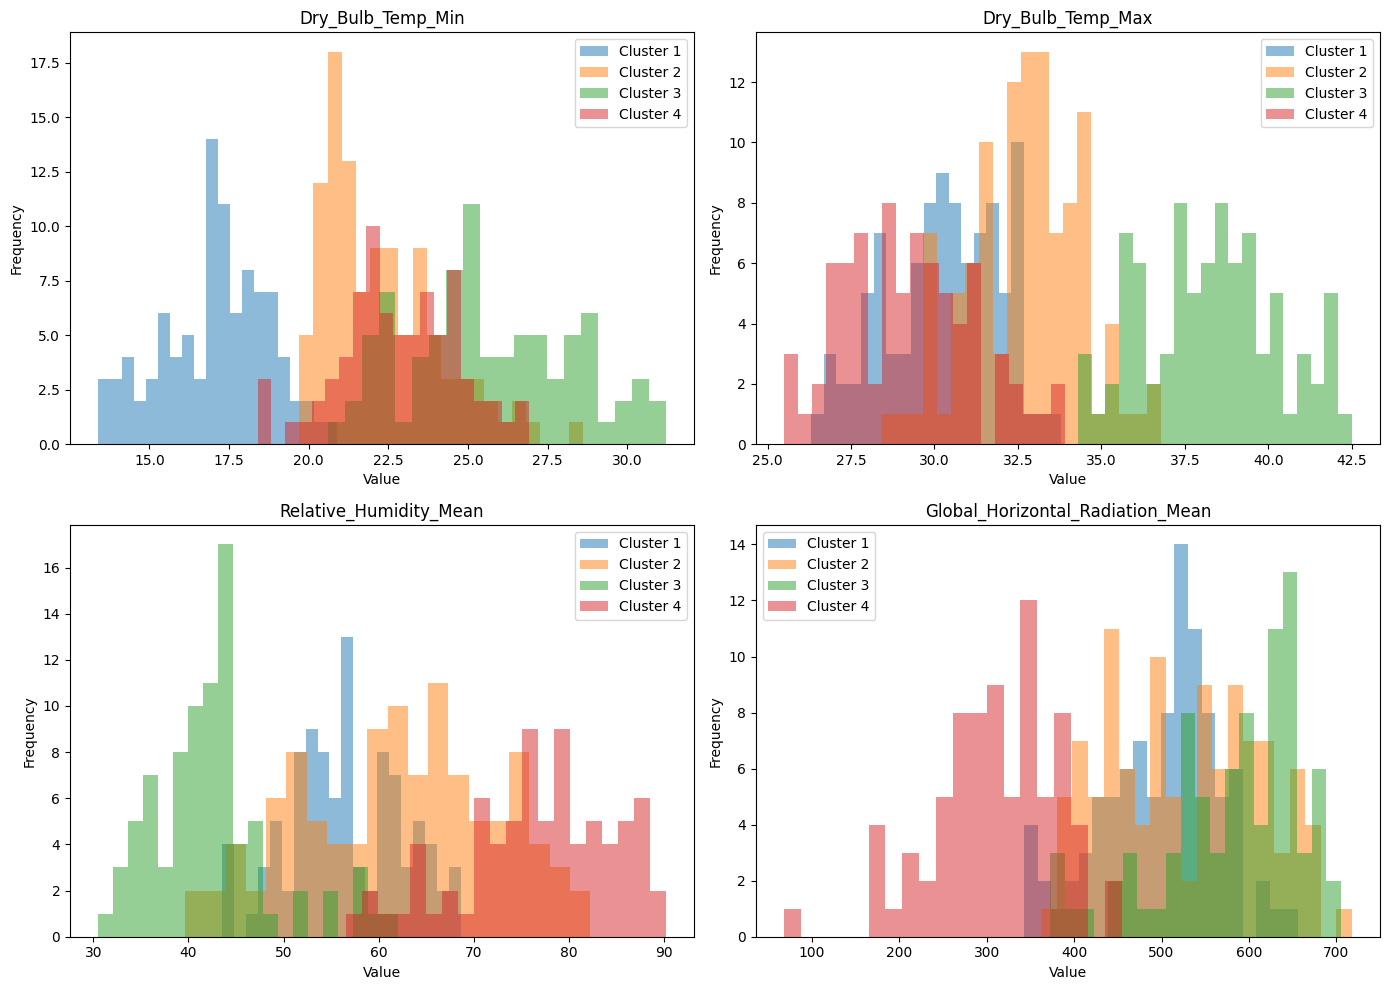

     Day  Cluster_Labels
0      1               3
1      2               0
2      3               0
3      4               0
4      5               0
..   ...             ...
360  361               0
361  362               0
362  363               0
363  364               3
364  365               0

[365 rows x 2 columns]


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/hyderabad_clustered_data.xlsx"
# results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
print(cluster_counts, best_cluster_count)

# Plot histograms for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        axes[i].hist(cluster_data[var], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])


[ 85  77  96 107] 4


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3444163980.py:101: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3444163980.py:101: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3444163980.py:101: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
C:\Users\Alok Kumar Pande

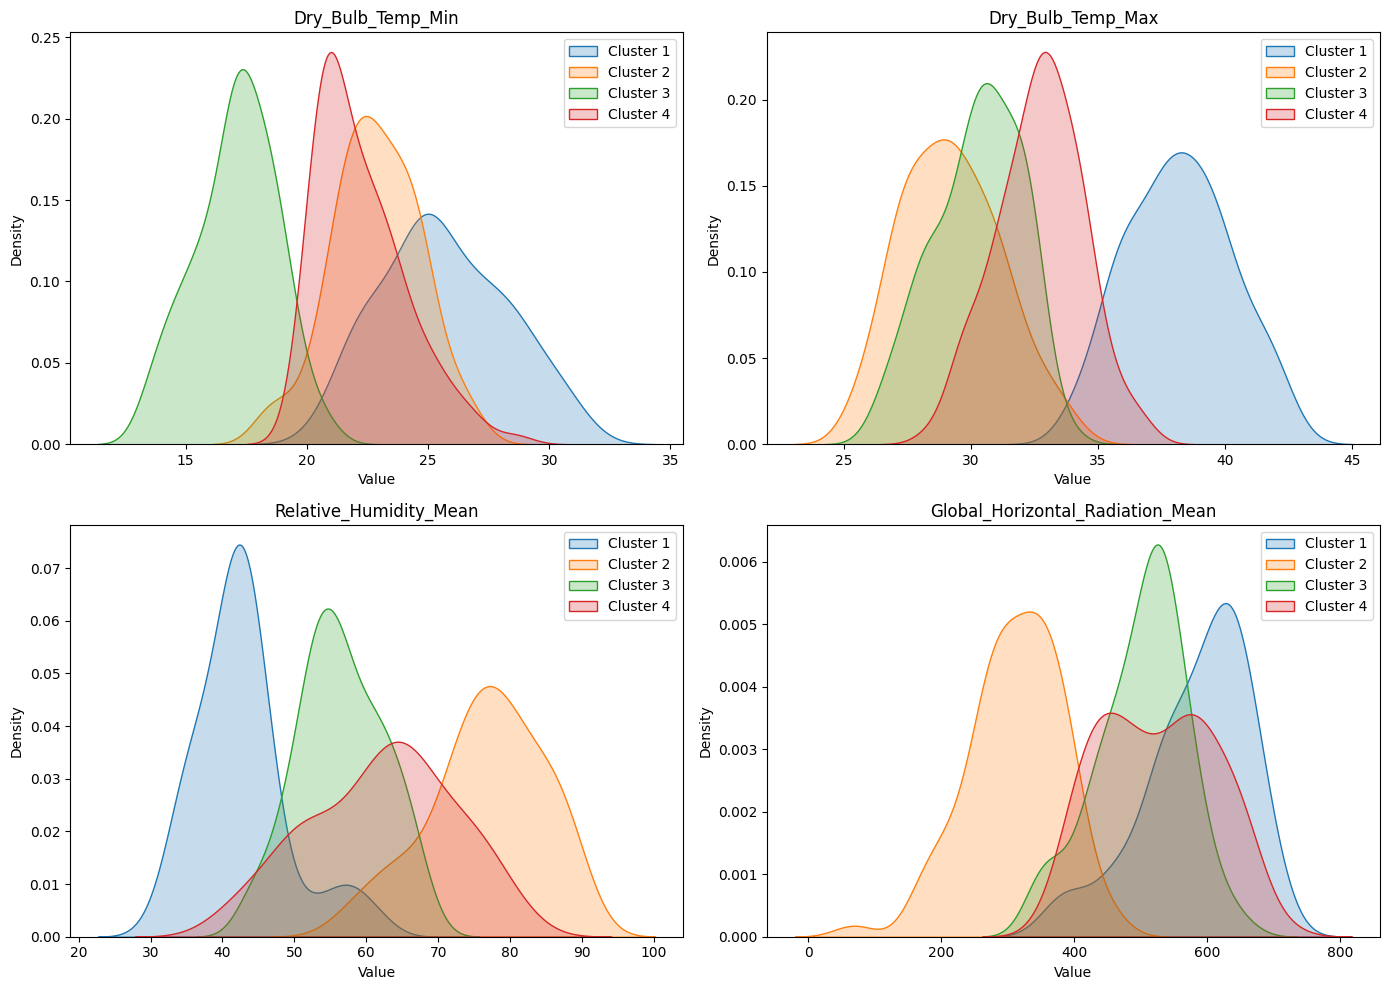

     Day  Cluster_Labels
0      1               1
1      2               2
2      3               2
3      4               2
4      5               2
..   ...             ...
360  361               2
361  362               2
362  363               2
363  364               1
364  365               2

[365 rows x 2 columns]


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Save the clustered result to an Excel file
output_file = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/hyderabad_clustered_data.xlsx"
# results.to_excel(output_file, index=False)

# Print the cluster counts and the best cluster count
print(cluster_counts, best_cluster_count)

# Plot KDEs (kernel density estimates) for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3836407341.py:156: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cluster_properties_df = pd.concat([cluster_properties_df, pd.DataFrame(rows)], ignore_index=True)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3836407341.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3836407341.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn 

Cluster 0:
  Centroid: [ 25.69642857  38.26666667  42.56349206 583.84592953]
  Number of Days: 84
  Dry_Bulb_Temp_Min: Max=31.2, Min=20.6, Mean=25.696428571428573
  Dry_Bulb_Temp_Max: Max=42.5, Min=34.3, Mean=38.266666666666666
  Relative_Humidity_Mean: Max=62.0, Min=30.541666666666668, Mean=42.56349206349206
  Global_Horizontal_Radiation_Mean: Max=705.1818181818181, Min=372.45454545454544, Mean=583.8459295334296
  Covariance Matrix:
[[ 6.61408348e+00  3.42698795e+00  2.99927567e+00 -8.07994616e+01]
 [ 3.42698795e+00  4.00923695e+00 -1.94093039e-01  4.99894325e+01]
 [ 2.99927567e+00 -1.94093039e-01  4.08506307e+01 -1.14834156e+02]
 [-8.07994616e+01  4.99894325e+01 -1.14834156e+02  6.27840571e+03]]

Cluster 1:
  Centroid: [ 22.83506494  29.21688312  76.71482684 310.62714061]
  Number of Days: 77
  Dry_Bulb_Temp_Min: Max=26.9, Min=18.4, Mean=22.83506493506493
  Dry_Bulb_Temp_Max: Max=33.9, Min=25.5, Mean=29.216883116883114
  Relative_Humidity_Mean: Max=90.16666666666667, Min=56.541666666

C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3836407341.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3836407341.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_4704\3836407341.py:182: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
C:\Users\Alok Kumar Pande

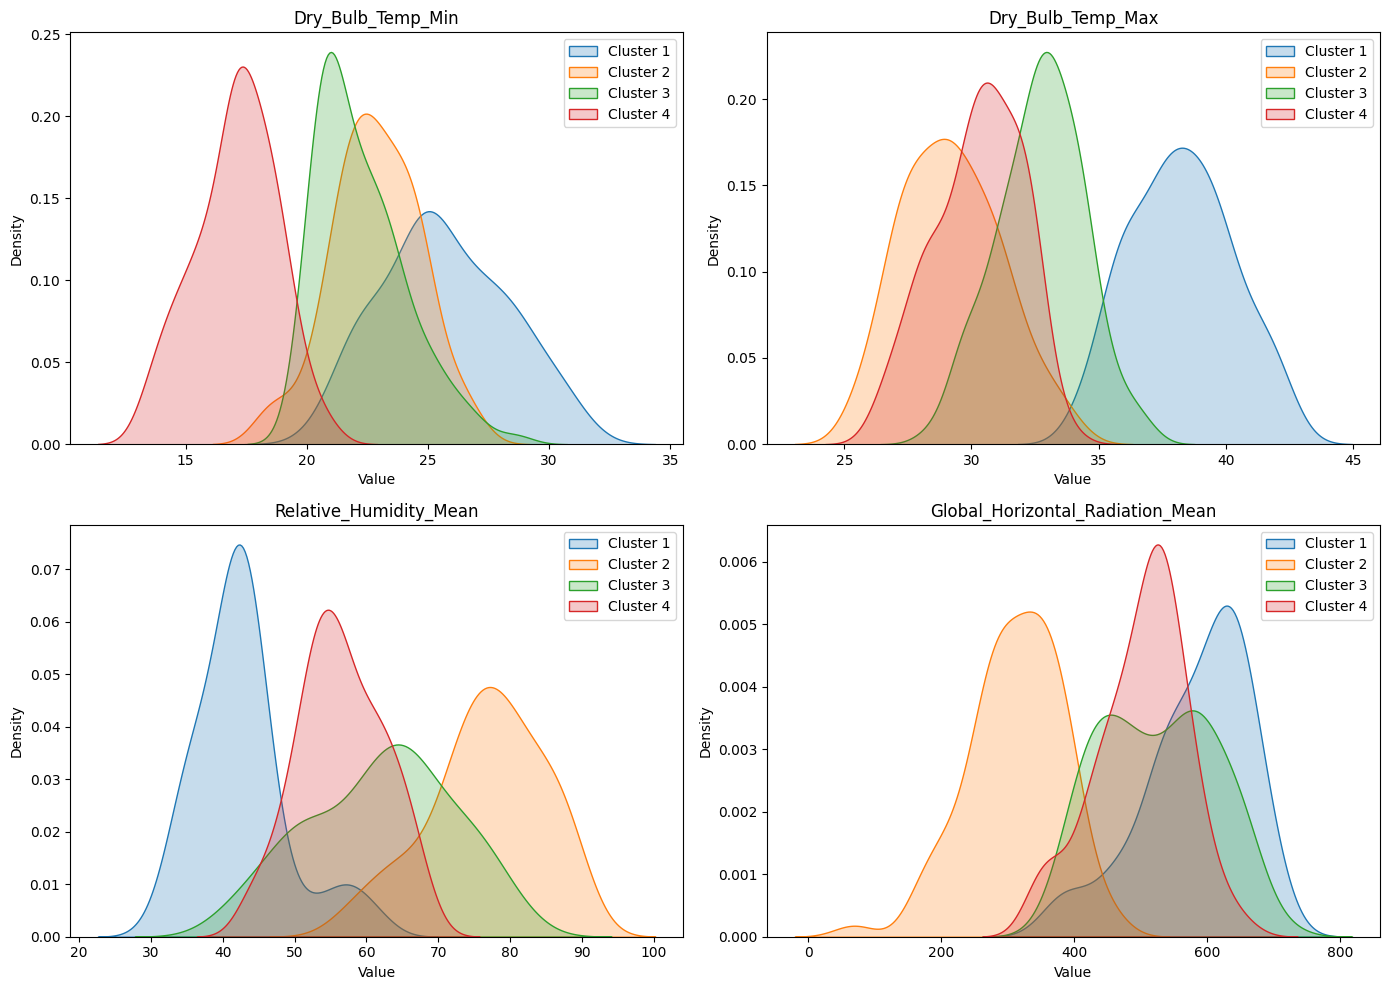

     Day  Cluster_Labels
0      1               1
1      2               3
2      3               3
3      4               3
4      5               3
..   ...             ...
360  361               3
361  362               3
362  363               3
363  364               1
364  365               3

[365 rows x 2 columns]


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
# Add a column for day, assuming data starts at the beginning of the day
data['Day'] = (data.index // 24) + 1

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_radiation.append(mean_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:  # Store the first valid result if 4 or 5 clusters are not found yet
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Compute cluster properties
cluster_properties = []
for cluster in np.unique(best_labels):
    cluster_data = results[results['Cluster_Labels'] == cluster]
    
    centroid = cluster_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].mean().values
    num_days = len(cluster_data)
    
    covariance_matrix = np.cov(cluster_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values.T)
    
    properties = {
        'Cluster': cluster,
        'Centroid': centroid,
        'Num_Days': num_days,
        'Covariance_Matrix': covariance_matrix,
        'Dry_Bulb_Temp_Min': {
            'Max': cluster_data['Dry_Bulb_Temp_Min'].max(),
            'Min': cluster_data['Dry_Bulb_Temp_Min'].min(),
            'Mean': cluster_data['Dry_Bulb_Temp_Min'].mean()
        },
        'Dry_Bulb_Temp_Max': {
            'Max': cluster_data['Dry_Bulb_Temp_Max'].max(),
            'Min': cluster_data['Dry_Bulb_Temp_Max'].min(),
            'Mean': cluster_data['Dry_Bulb_Temp_Max'].mean()
        },
        'Relative_Humidity_Mean': {
            'Max': cluster_data['Relative_Humidity_Mean'].max(),
            'Min': cluster_data['Relative_Humidity_Mean'].min(),
            'Mean': cluster_data['Relative_Humidity_Mean'].mean()
        },
        'Global_Horizontal_Radiation_Mean': {
            'Max': cluster_data['Global_Horizontal_Radiation_Mean'].max(),
            'Min': cluster_data['Global_Horizontal_Radiation_Mean'].min(),
            'Mean': cluster_data['Global_Horizontal_Radiation_Mean'].mean()
        }
    }
    
    cluster_properties.append(properties)

# Create a DataFrame for the cluster properties
cluster_properties_df = pd.DataFrame(columns=[
    'Cluster', 'Centroid', 'Num_Days',
    'Dry_Bulb_Temp_Min_Max', 'Dry_Bulb_Temp_Min_Min', 'Dry_Bulb_Temp_Min_Mean',
    'Dry_Bulb_Temp_Max_Max', 'Dry_Bulb_Temp_Max_Min', 'Dry_Bulb_Temp_Max_Mean',
    'Relative_Humidity_Mean_Max', 'Relative_Humidity_Mean_Min', 'Relative_Humidity_Mean_Mean',
    'Global_Horizontal_Radiation_Mean_Max', 'Global_Horizontal_Radiation_Mean_Min', 'Global_Horizontal_Radiation_Mean_Mean',
    'Covariance_Matrix'
])

rows = []
for properties in cluster_properties:
    row = {
        'Cluster': properties['Cluster'],
        'Centroid': properties['Centroid'],
        'Num_Days': properties['Num_Days'],
        'Dry_Bulb_Temp_Min_Max': properties['Dry_Bulb_Temp_Min']['Max'],
        'Dry_Bulb_Temp_Min_Min': properties['Dry_Bulb_Temp_Min']['Min'],
        'Dry_Bulb_Temp_Min_Mean': properties['Dry_Bulb_Temp_Min']['Mean'],
        'Dry_Bulb_Temp_Max_Max': properties['Dry_Bulb_Temp_Max']['Max'],
        'Dry_Bulb_Temp_Max_Min': properties['Dry_Bulb_Temp_Max']['Min'],
        'Dry_Bulb_Temp_Max_Mean': properties['Dry_Bulb_Temp_Max']['Mean'],
        'Relative_Humidity_Mean_Max': properties['Relative_Humidity_Mean']['Max'],
        'Relative_Humidity_Mean_Min': properties['Relative_Humidity_Mean']['Min'],
        'Relative_Humidity_Mean_Mean': properties['Relative_Humidity_Mean']['Mean'],
        'Global_Horizontal_Radiation_Mean_Max': properties['Global_Horizontal_Radiation_Mean']['Max'],
        'Global_Horizontal_Radiation_Mean_Min': properties['Global_Horizontal_Radiation_Mean']['Min'],
        'Global_Horizontal_Radiation_Mean_Mean': properties['Global_Horizontal_Radiation_Mean']['Mean'],
        'Covariance_Matrix': properties['Covariance_Matrix']
    }
    rows.append(row)

cluster_properties_df = pd.concat([cluster_properties_df, pd.DataFrame(rows)], ignore_index=True)

# Save the cluster properties to an Excel file
output_file_properties = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/hyderabad_cluster_properties.xlsx"
with pd.ExcelWriter(output_file_properties) as writer:
    cluster_properties_df.to_excel(writer, index=False, sheet_name='Cluster_Properties')

# Print cluster properties
for properties in cluster_properties:
    print(f"Cluster {properties['Cluster']}:")
    print(f"  Centroid: {properties['Centroid']}")
    print(f"  Number of Days: {properties['Num_Days']}")
    for key in ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']:
        print(f"  {key}: Max={properties[key]['Max']}, Min={properties[key]['Min']}, Mean={properties[key]['Mean']}")
    print(f"  Covariance Matrix:\n{properties['Covariance_Matrix']}")
    print()

# Plot KDEs (kernel density estimates) for all variables in all clusters in one plot
variables = ['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    for cluster in np.unique(best_labels):
        cluster_data = results[results['Cluster_Labels'] == cluster]
        sns.kdeplot(cluster_data[var], ax=axes[i], label=f'Cluster {cluster + 1}', shade=True)
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print the days along with their assigned cluster numbers
print(results[['Day', 'Cluster_Labels']])

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data.xlsx"
data = pd.read_excel(file_path)

# Group data by day (each day is 24 rows)
data['Day'] = (data.index // 24) + 1

# Classifying the "Relative Humidity" column
def classify_humidity(value):
    if value < 40:
        return 'dry'
    elif 40 <= value <= 60:
        return 'comfortable'
    else:
        return 'humid'

data['Humidity Classification'] = data['Relative Humidity'].apply(classify_humidity)

# Classifying the "Dry Bulb Temperature" column
def classify_temperature(value):
    if value < 0:
        return 0
    elif 0 <= value < 5:
        return 1
    elif 5 <= value < 10:
        return 2
    elif 10 <= value < 15:
        return 3
    elif 15 <= value < 20:
        return 4
    elif 20 <= value < 25:
        return 5
    elif 25 <= value < 30:
        return 6
    elif 30 <= value < 35:
        return 7
    elif 35 <= value < 40:
        return 8
    else:
        return 9

data['Temperature Classification'] = data['Dry Bulb Temperature'].apply(classify_temperature)

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_global_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_global_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_global_radiation.append(mean_global_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_global_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Initialize the dictionary to store the count of temperature bins in each cluster
temperature_bin_counts = {bin_idx: [] for bin_idx in range(10)}

# Calculate the count of temperature bins in each cluster
for cluster in np.unique(best_labels):
    cluster_data = data[data['Day'].isin(results[results['Cluster_Labels'] == cluster]['Day'])]
    for bin_idx in range(10):
        count = cluster_data[cluster_data['Temperature Classification'] == bin_idx].shape[0]
        temperature_bin_counts[bin_idx].append(count)

# Compute cluster properties
cluster_properties = []
for cluster in np.unique(best_labels):
    cluster_data = results[results['Cluster_Labels'] == cluster]
    
    centroid = cluster_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].mean().values
    num_days = len(cluster_data)
    
    daily_data = data[data['Day'].isin(cluster_data['Day'])]
    day_data = daily_data[daily_data['Diffuse Horizontal Radiation'] > 0]
    night_data = daily_data[daily_data['Diffuse Horizontal Radiation'] == 0]
    
    mean_wind_speed_day = day_data[day_data['Wind Speed'] > 0.5]['Wind Speed'].mean()
    mean_wind_speed_night = night_data[night_data['Wind Speed'] > 0.5]['Wind Speed'].mean()
    
    min_temp_1p = np.percentile(cluster_data['Dry_Bulb_Temp_Min'], 1)
    min_temp_99p = np.percentile(cluster_data['Dry_Bulb_Temp_Min'], 99)
    max_temp_1p = np.percentile(cluster_data['Dry_Bulb_Temp_Max'], 1)
    max_temp_99p = np.percentile(cluster_data['Dry_Bulb_Temp_Max'], 99)
    humidity_mean_1p = np.percentile(cluster_data['Relative_Humidity_Mean'], 1)
    humidity_mean_99p = np.percentile(cluster_data['Relative_Humidity_Mean'], 99)
    radiation_mean_1p = np.percentile(cluster_data['Global_Horizontal_Radiation_Mean'], 1)
    radiation_mean_99p = np.percentile(cluster_data['Global_Horizontal_Radiation_Mean'], 99)
    
    # Determine the predominant radiation type
    mean_diffuse_radiation = daily_data[daily_data['Diffuse Horizontal Radiation'] > 50]['Diffuse Horizontal Radiation'].mean()
    mean_direct_radiation = daily_data[daily_data['Direct Normal Radiation'] > 50]['Direct Normal Radiation'].mean()
    
    if mean_diffuse_radiation > 0 and mean_direct_radiation > 0:
        if mean_direct_radiation >= 1.2 * mean_diffuse_radiation:
            predominant_radiation = 'Direct Normal Radiation'
        elif mean_diffuse_radiation >= 1.2 * mean_direct_radiation:
            predominant_radiation = 'Diffuse Horizontal Radiation'
        else:
            predominant_radiation = 'None Predominant'
    else:
        predominant_radiation = 'None Predominant'
    
    # Calculate heating and cooling degree hours
    daily_data['Heating Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x < 20 else np.nan)
    daily_data['Cooling Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x > 30 else np.nan)
    
    daily_data['Heating Degree Hours'] = daily_data['Heating Degree Temperature'].apply(lambda x: 20 - x if pd.notna(x) else 0)
    daily_data['Cooling Degree Hours'] = daily_data['Cooling Degree Temperature'].apply(lambda x: x - 30 if pd.notna(x) else 0)
    
    heating_degree_hours = daily_data['Heating Degree Hours'].sum()
    cooling_degree_hours = daily_data['Cooling Degree Hours'].sum()
    
    properties = {
        'Cluster': cluster,
        'Centroid': centroid,
        'Num_Days': num_days,
        'Dry_Bulb_Temp_Min_Max': min_temp_99p,
        'Dry_Bulb_Temp_Min_Min': min_temp_1p,
        'Dry_Bulb_Temp_Min_Mean': cluster_data['Dry_Bulb_Temp_Min'].mean(),
        'Dry_Bulb_Temp_Max_Max': max_temp_99p,
        'Dry_Bulb_Temp_Max_Min': max_temp_1p,
        'Dry_Bulb_Temp_Max_Mean': cluster_data['Dry_Bulb_Temp_Max'].mean(),
        'Relative_Humidity_Mean_Max': humidity_mean_99p,
        'Relative_Humidity_Mean_Min': humidity_mean_1p,
        'Relative_Humidity_Mean_Mean': cluster_data['Relative_Humidity_Mean'].mean(),
        'Global_Horizontal_Radiation_Mean_Max': radiation_mean_99p,
        'Global_Horizontal_Radiation_Mean_Min': radiation_mean_1p,
        'Global_Horizontal_Radiation_Mean_Mean': cluster_data['Global_Horizontal_Radiation_Mean'].mean(),
        'Mean_Wind_Speed_Day': mean_wind_speed_day,
        'Mean_Wind_Speed_Night': mean_wind_speed_night,
        'Predominant_Radiation': predominant_radiation,
        'Heating_Degree_Hours': heating_degree_hours,
        'Cooling_Degree_Hours': cooling_degree_hours
    }
    
    for bin_idx in range(10):
        properties[f'Temperature_Bin_{bin_idx}'] = temperature_bin_counts[bin_idx][cluster]
    
    cluster_properties.append(properties)

# Create a DataFrame for the cluster properties
cluster_properties_df = pd.DataFrame(cluster_properties, columns=[
    'Cluster', 'Centroid', 'Num_Days',
    'Dry_Bulb_Temp_Min_Max', 'Dry_Bulb_Temp_Min_Min', 'Dry_Bulb_Temp_Min_Mean',
    'Dry_Bulb_Temp_Max_Max', 'Dry_Bulb_Temp_Max_Min', 'Dry_Bulb_Temp_Max_Mean',
    'Relative_Humidity_Mean_Max', 'Relative_Humidity_Mean_Min', 'Relative_Humidity_Mean_Mean',
    'Global_Horizontal_Radiation_Mean_Max', 'Global_Horizontal_Radiation_Mean_Min', 'Global_Horizontal_Radiation_Mean_Mean',
    'Mean_Wind_Speed_Day', 'Mean_Wind_Speed_Night', 'Predominant_Radiation',
    'Heating_Degree_Hours', 'Cooling_Degree_Hours'
] + [f'Temperature_Bin_{bin_idx}' for bin_idx in range(10)])

# Save the results to an Excel file
results.to_excel("clustering_results000.xlsx", index=False)
cluster_properties_df.to_excel("cluster_properties.xlsx", index=False)

print("Clustering and analysis completed successfully.")


Clustering and analysis completed successfully.


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_15176\3791045989.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['Heating Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x < 20 else np.nan)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_15176\3791045989.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['Cooling Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x > 30 else np.nan)
C:\Users\Alok Kumar 

#### hehehe


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "C:/Users/Alok Kumar Pandey/OneDrive/Desktop/coding/Climo intern/Hyderabad raw data.xlsx"
data = pd.read_excel(file_path)

# Function to convert degrees to wind direction
def degrees_to_direction(degrees):
    if degrees >= 337.5 or degrees < 22.5:
        return 'north'
    elif 22.5 <= degrees < 67.5:
        return 'north-east'
    elif 67.5 <= degrees < 112.5:
        return 'east'
    elif 112.5 <= degrees < 157.5:
        return 'south-east'
    elif 157.5 <= degrees < 202.5:
        return 'south'
    elif 202.5 <= degrees < 247.5:
        return 'south-west'
    elif 247.5 <= degrees < 292.5:
        return 'west'
    elif 292.5 <= degrees < 337.5:
        return 'north-west'

# Apply the function to the 'Wind Direction' column
data['Wind Direction Name'] = data['Wind Direction'].apply(degrees_to_direction)

# Group data by day (each day is 24 rows)
data['Day'] = (data.index // 24) + 1

# Classifying the "Relative Humidity" column
def classify_humidity(value):
    if value < 40:
        return 'dry'
    elif 40 <= value <= 60:
        return 'comfortable'
    else:
        return 'humid'

data['Humidity Classification'] = data['Relative Humidity'].apply(classify_humidity)

# Classifying the "Dry Bulb Temperature" column
def classify_temperature(value):
    if value < 5:
        return 0
    elif 5 <= value < 10:
        return 1
    elif 10 <= value < 15:
        return 2
    elif 15 <= value < 20:
        return 3
    elif 20 <= value < 30:
        return 4
    elif 30 <= value < 35:
        return 5
    elif 35 <= value < 40:
        return 6
    elif 40 <= value < 45:
        return 7
    else:
        return 8

data['Temperature Classification'] = data['Dry Bulb Temperature'].apply(classify_temperature)

# Classifying the dbt related columns in the cluster properties dataframe
def temperature_classification(value):
    if value < 5:
        return "Extremely cold"
    elif 5 <= value < 10:
        return "Very cold"
    elif 10 <= value < 15:
        return "Cold"
    elif 15 <= value < 20:
        return "Cool"
    elif 20 <= value < 30:
        return "Comfortable"
    elif 30 <= value < 35:
        return "Warm"
    elif 35 <= value < 40:
        return "Hot"
    elif 40 <= value < 45:
        return "Very hot"
    else:
        return "Extremely hot"
    
# Classifying the ghi related columns in the cluster properties dataframe
def ghi_classification(value):
    if value < 315:
        return "Low"
    elif 315 <= value < 601:
        return "Moderate"
    else:
        return "High"

# Classifying the wind speed related columns in the cluster properties dataframe 
def wind_speed_classification(value):
    if value < 1:
        return "Light"
    elif 1 <= value < 2.3:
        return "Moderate"
    else:
        return "Strong"
    
# Classifying the relative humidity related columns in the cluster properties dataframe 
def humidity_classification(value):
    if value < 40:
        return "Dry"
    elif 40 <= value < 60:
        return "Moderate"
    else:
        return "Humid"
    
# Classifying the heating degree hours related columns in the cluster properties dataframe 
def heating_degree_hours_classification(value):
    if value < 24:
        return "Low"
    elif 24 <= value < 75:
        return "Moderately low"
    elif 75 <= value < 194:
        return "Moderate"
    elif 194 <= value < 456:
        return "Moderately high"
    else:
        return "High"
    
# Classifying the cooling degree hours related columns in the cluster properties dataframe 
def cooling_degree_hours_classification(value):
    if value < 8:
        return "Low"
    elif 8 <= value < 21:
        return "Moderately low"
    elif 21 <= value < 40:
        return "Moderate"
    elif 40 <= value < 71:
        return "Moderately high"
    else:
        return "High"
    
# Classifying the comfortable hours related columns in the cluster properties dataframe 
def comfortable_hours_classification(value):
    if value < 8:
        return "Low"
    elif 8 <= value < 12:
        return "Moderately low"
    elif 12 <= value < 14:
        return "Moderate"
    elif 14 <= value < 18:
        return "Moderately high"
    else:
        return "High"
    
# For naming of columns of temperature bins in cluster properties
temperature_descriptions = [
    "Extremely cold", "Very cold", "Cold", "Cool", 
    "Comfortable", "Warm", "Hot", "Very hot", "Extremely hot"
]

# Initialize lists to store daily statistics
daily_min_temp = []
daily_max_temp = []
daily_mean_humidity = []
daily_mean_global_radiation = []

# Process each day
for day in data['Day'].unique():
    daily_data = data[data['Day'] == day]
    
    min_temp = daily_data['Dry Bulb Temperature'].min()
    max_temp = daily_data['Dry Bulb Temperature'].max()
    mean_humidity = daily_data['Relative Humidity'].mean()
    mean_global_radiation = daily_data[daily_data['Global Horizontal Radiation'] > 50]['Global Horizontal Radiation'].mean()
    
    daily_min_temp.append(min_temp)
    daily_max_temp.append(max_temp)
    daily_mean_humidity.append(mean_humidity)
    daily_mean_global_radiation.append(mean_global_radiation)

# Create a DataFrame for the results
results = pd.DataFrame({
    'Day': data['Day'].unique(),
    'Dry_Bulb_Temp_Min': daily_min_temp,
    'Dry_Bulb_Temp_Max': daily_max_temp,
    'Relative_Humidity_Mean': daily_mean_humidity,
    'Global_Horizontal_Radiation_Mean': daily_mean_global_radiation
})

# Extract the relevant columns
data_values = results[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_values)

# Define the range of clusters to test
cluster_range = range(3, 7)
best_cluster_count = None
best_labels = None

# Perform fuzzy c-means clustering for each number of clusters
for n_clusters in cluster_range:
    # Fuzzy c-means clustering
    fcm = FCM(n_clusters=n_clusters, max_iter=1000, m=2, error=0.005)
    fcm.fit(data_scaled)
    
    # Assign each data point to the cluster with the highest membership score
    cluster_labels = np.argmax(fcm.u, axis=1)
    
    # Count the number of days in each cluster
    cluster_counts = np.bincount(cluster_labels)
    
    # Check if all clusters have at least 20 days
    if np.all(cluster_counts >= 20):
        if n_clusters == 4 or n_clusters == 5:
            best_cluster_count = n_clusters
            best_labels = cluster_labels
            break
        if best_cluster_count is None:
            best_cluster_count = n_clusters
            best_labels = cluster_labels

# Report the number of days in each cluster for the optimal clustering solution
cluster_counts = np.bincount(best_labels)

# Add the cluster labels to the results DataFrame
results['Cluster_Labels'] = best_labels

# Initialize the dictionary to store the count of temperature bins in each cluster
temperature_bin_counts = {bin_idx: [] for bin_idx in range(9)}

# Calculate the count of temperature bins in each cluster
for cluster in np.unique(best_labels):
    cluster_data = data[data['Day'].isin(results[results['Cluster_Labels'] == cluster]['Day'])]
    for bin_idx in range(9):
        count = cluster_data[cluster_data['Temperature Classification'] == bin_idx].shape[0]
        temperature_bin_counts[bin_idx].append(count)

# Compute cluster properties
cluster_properties = []
for cluster in np.unique(best_labels):
    cluster_data = results[results['Cluster_Labels'] == cluster]
    
    centroid = cluster_data[['Dry_Bulb_Temp_Min', 'Dry_Bulb_Temp_Max', 'Relative_Humidity_Mean', 'Global_Horizontal_Radiation_Mean']].mean().values
    num_days = len(cluster_data)
    
    daily_data = data[data['Day'].isin(cluster_data['Day'])]
    day_data = daily_data[daily_data['Diffuse Horizontal Radiation'] > 0]
    night_data = daily_data[daily_data['Diffuse Horizontal Radiation'] == 0]
    
    mean_wind_speed_day = day_data[day_data['Wind Speed'] > 0.5]['Wind Speed'].mean()
    mean_wind_speed_night = night_data[night_data['Wind Speed'] > 0.5]['Wind Speed'].mean()
    
    min_temp_1p = np.percentile(cluster_data['Dry_Bulb_Temp_Min'], 1)
    min_temp_99p = np.percentile(cluster_data['Dry_Bulb_Temp_Min'], 99)
    max_temp_1p = np.percentile(cluster_data['Dry_Bulb_Temp_Max'], 1)
    max_temp_99p = np.percentile(cluster_data['Dry_Bulb_Temp_Max'], 99)
    humidity_mean_1p = np.percentile(cluster_data['Relative_Humidity_Mean'], 1)
    humidity_mean_99p = np.percentile(cluster_data['Relative_Humidity_Mean'], 99)
    radiation_mean_1p = np.percentile(cluster_data['Global_Horizontal_Radiation_Mean'], 1)
    radiation_mean_99p = np.percentile(cluster_data['Global_Horizontal_Radiation_Mean'], 99)
    
    # Determine the predominant radiation type
    mean_diffuse_radiation = daily_data[daily_data['Diffuse Horizontal Radiation'] > 50]['Diffuse Horizontal Radiation'].mean()
    mean_direct_radiation = daily_data[daily_data['Direct Normal Radiation'] > 50]['Direct Normal Radiation'].mean()
    
    if mean_diffuse_radiation > 0 and mean_direct_radiation > 0:
        if mean_direct_radiation >= 1.2 * mean_diffuse_radiation:
            predominant_radiation = 'Direct Normal Radiation'
        elif mean_diffuse_radiation >= 1.2 * mean_direct_radiation:
            predominant_radiation = 'Diffuse Horizontal Radiation'
        else:
            predominant_radiation = 'None Predominant'
    else:
        predominant_radiation = 'None Predominant'
    
    # Calculate heating and cooling degree hours
    daily_data['Heating Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x < 20 else np.nan)
    daily_data['Cooling Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x > 30 else np.nan)
    
    daily_data['Heating Degree Hours'] = daily_data['Heating Degree Temperature'].apply(lambda x: 20 - x if pd.notna(x) else 0)
    daily_data['Cooling Degree Hours'] = daily_data['Cooling Degree Temperature'].apply(lambda x: x - 30 if pd.notna(x) else 0)
    
    heating_degree_hours = daily_data['Heating Degree Hours'].sum()
    cooling_degree_hours = daily_data['Cooling Degree Hours'].sum()

    heating_degree_hours_per_day = heating_degree_hours/num_days
    cooling_degree_hours_per_day = cooling_degree_hours/num_days

    # Calculate comfortable hours
    daily_data['Comfortable temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if 20 < x < 30 else np.nan)
    daily_data['Comfortable hours'] = daily_data['Comfortable temperature'].apply(lambda x: 1 if pd.notna(x) else 0)
    comfortable_hours = daily_data['Comfortable hours'].sum()
    comfortable_hours_per_day = comfortable_hours/num_days
    
    # Determine the most prevalent wind direction
    prevalent_wind_direction = daily_data['Wind Direction Name'].mode()[0]

    # Calculate prevalent wind speed in the prevalent wind direction
    prevalent_wind_speed_day = day_data[(day_data['Wind Direction Name'] == prevalent_wind_direction) & (day_data['Wind Speed'] > 0.5)]['Wind Speed'].mean()
    prevalent_wind_speed_night = night_data[(night_data['Wind Direction Name'] == prevalent_wind_direction) & (night_data['Wind Speed'] > 0.5)]['Wind Speed'].mean()

    # Calculate min dbt mean and max dbt mean
    min_dbt_mean = cluster_data['Dry_Bulb_Temp_Min'].mean()
    max_dbt_mean = cluster_data['Dry_Bulb_Temp_Max'].mean()

    # Calculate mean ghi
    ghi_mean = cluster_data['Global_Horizontal_Radiation_Mean'].mean()

    # Calculate mean rel humidity
    relative_humidity_mean = cluster_data['Relative_Humidity_Mean'].mean()

    # Discriptions of temperature
    Dry_Bulb_Temp_Min_Max_des = temperature_classification(min_temp_99p)
    Dry_Bulb_Temp_Min_Min_des = temperature_classification(min_temp_1p)
    Dry_Bulb_Temp_Min_Mean_des = temperature_classification(min_dbt_mean)
    Dry_Bulb_Temp_Max_Max_des = temperature_classification(max_temp_99p)
    Dry_Bulb_Temp_Max_Min_des = temperature_classification(max_temp_1p)
    Dry_Bulb_Temp_Max_Mean_des = temperature_classification(max_dbt_mean)

    # Discriptions of ghi
    Global_Horizontal_Radiation_Mean_Mean_des = ghi_classification(ghi_mean)

    # Discriptions of wind speed
    Mean_Wind_Speed_Day_des = wind_speed_classification(mean_wind_speed_day)
    Mean_Wind_Speed_Night_des = wind_speed_classification(mean_wind_speed_night)
    Prevalent_wind_speed_day_des = wind_speed_classification(prevalent_wind_speed_day)
    Prevalent_wind_speed_night_des = wind_speed_classification(prevalent_wind_speed_night)

    # Discriptions of relative humidity
    Relative_Humidity_Mean_Mean_des = humidity_classification(relative_humidity_mean)

    # Discriptions of heating degree hours
    heating_degree_hours_per_day_des = heating_degree_hours_classification(heating_degree_hours_per_day)

    # Discriptions of cooling degree hours
    cooling_degree_hours_per_day_des = cooling_degree_hours_classification(cooling_degree_hours_per_day)

    # Discriptions of comfortable hours
    comfortable_hours_per_day_des = comfortable_hours_classification(comfortable_hours_per_day)

    properties = {
        'Cluster': cluster,
        'Centroid': centroid,
        'Num_Days': num_days,
        'Dry_Bulb_Temp_Min_Max': min_temp_99p,
        'Dry_Bulb_Temp_Min_Max_des': Dry_Bulb_Temp_Min_Max_des,
        'Dry_Bulb_Temp_Min_Min': min_temp_1p,
        'Dry_Bulb_Temp_Min_Min_des': Dry_Bulb_Temp_Min_Min_des,
        'Dry_Bulb_Temp_Min_Mean': min_dbt_mean,
        'Dry_Bulb_Temp_Min_Mean_des': Dry_Bulb_Temp_Min_Mean_des,
        'Dry_Bulb_Temp_Max_Max': max_temp_99p,
        'Dry_Bulb_Temp_Max_Max_des': Dry_Bulb_Temp_Max_Max_des,
        'Dry_Bulb_Temp_Max_Min': max_temp_1p,
        'Dry_Bulb_Temp_Max_Min_des': Dry_Bulb_Temp_Max_Min_des,
        'Dry_Bulb_Temp_Max_Mean': max_dbt_mean,
        'Dry_Bulb_Temp_Max_Mean_des': Dry_Bulb_Temp_Max_Mean_des,
        'Relative_Humidity_Mean_Max': humidity_mean_99p,
        'Relative_Humidity_Mean_Min': humidity_mean_1p,
        'Relative_Humidity_Mean_Mean': relative_humidity_mean,
        'Relative_Humidity_Mean_Mean_des': Relative_Humidity_Mean_Mean_des,
        'Global_Horizontal_Radiation_Mean_Max': radiation_mean_99p,
        'Global_Horizontal_Radiation_Mean_Min': radiation_mean_1p,
        'Global_Horizontal_Radiation_Mean_Mean': ghi_mean,
        'Global_Horizontal_Radiation_Mean_Mean_des': Global_Horizontal_Radiation_Mean_Mean_des,
        'Mean_Wind_Speed_Day': mean_wind_speed_day,
        'Mean_Wind_Speed_Day_des': Mean_Wind_Speed_Day_des,
        'Mean_Wind_Speed_Night': mean_wind_speed_night,
        'Mean_Wind_Speed_Night_des': Mean_Wind_Speed_Night_des,
        'Predominant_Radiation': predominant_radiation,
        'Heating_Degree_Hours': heating_degree_hours,
        'Heating_degree_hours_per_day': heating_degree_hours_per_day,
        'Heating_degree_hours_per_day_des': heating_degree_hours_per_day_des,
        'Cooling_Degree_Hours': cooling_degree_hours,
        'Cooling_degree_hours_per_day': cooling_degree_hours_per_day,
        'Cooling_degree_hours_per_day_des': cooling_degree_hours_per_day_des,
        'Comfortable_hours': comfortable_hours,
        'Comfortable_hours_per_day': comfortable_hours_per_day,
        'Comfortable_hours_per_day_des': comfortable_hours_per_day_des,
        'Prevalent_Wind_Direction': prevalent_wind_direction,
        'Prevalent_wind_speed_day': prevalent_wind_speed_day,
        'Prevalent_wind_speed_day_des': Prevalent_wind_speed_day_des,
        'Prevalent_wind_speed_night': prevalent_wind_speed_night,
        'Prevalent_wind_speed_night_des': Prevalent_wind_speed_night_des
    }
    
    for bin_idx, description in enumerate(temperature_descriptions):
        properties[f'Temperature_Bin_{bin_idx}_{description}'] = temperature_bin_counts[bin_idx][cluster]
    
    cluster_properties.append(properties)

# Create a DataFrame for the cluster properties
cluster_properties_df = pd.DataFrame(cluster_properties, columns=[
    'Cluster', 'Num_Days',
    'Dry_Bulb_Temp_Min_Max', 'Dry_Bulb_Temp_Min_Max_des','Dry_Bulb_Temp_Min_Min', 'Dry_Bulb_Temp_Min_Min_des',
    'Dry_Bulb_Temp_Min_Mean', 'Dry_Bulb_Temp_Min_Mean_des',
    'Dry_Bulb_Temp_Max_Max', 'Dry_Bulb_Temp_Max_Max_des','Dry_Bulb_Temp_Max_Min', 'Dry_Bulb_Temp_Max_Min_des',
    'Dry_Bulb_Temp_Max_Mean', 'Dry_Bulb_Temp_Max_Mean_des',
    'Relative_Humidity_Mean_Mean', 'Relative_Humidity_Mean_Mean_des','Global_Horizontal_Radiation_Mean_Mean', 'Global_Horizontal_Radiation_Mean_Mean_des',
    'Mean_Wind_Speed_Day', 'Mean_Wind_Speed_Day_des','Mean_Wind_Speed_Night', 'Mean_Wind_Speed_Night_des',
    'Predominant_Radiation', 'Heating_Degree_Hours', 'Heating_degree_hours_per_day', 'Heating_degree_hours_per_day_des',
    'Cooling_Degree_Hours', 'Cooling_degree_hours_per_day', 'Cooling_degree_hours_per_day_des',
    'Comfortable_hours', 'Comfortable_hours_per_day', 'Comfortable_hours_per_day_des', 'Prevalent_Wind_Direction',
    'Prevalent_wind_speed_day', 'Prevalent_wind_speed_day_des', 'Prevalent_wind_speed_night', 'Prevalent_wind_speed_night_des'
] + [f'Temperature_Bin_{bin_idx}_{description}' for bin_idx, description in enumerate(temperature_descriptions)])

# Save the results to an Excel file
results.to_excel("clustering_results12.xlsx", index=False)
cluster_properties_df.to_excel("cluster_properties12.xlsx", index=False)

print("Clustering and analysis completed successfully.")


Clustering and analysis completed successfully.


C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_18220\156346749.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['Heating Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x < 20 else np.nan)
C:\Users\Alok Kumar Pandey\AppData\Local\Temp\ipykernel_18220\156346749.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['Cooling Degree Temperature'] = daily_data['Dry Bulb Temperature'].apply(lambda x: x if x > 30 else np.nan)
C:\Users\Alok Kumar Pa

In [1]:
name_loc=Hyderabad
results['output para']=f"""{name_loc} ({latitude} degree latitude and {longitude} degree longitude) has {no_of_clusters} major seasons. The {no_of_clusters} seasons have (no of days in first season), (no of days in second season), (no of days in third season), (no of days in fourth season), (no of days in fifth season), and (no of days in sixth season) no of days.
(name of first season):
(name of first season) season has around (no of days in first season) days. The maximum and minimum of minimum dry bulb temperature is generally {results['Dry_Bulb_Temp_Min_Max_des']}({results['Dry_Bulb_Temp_Min_Max']} and {results['Dry_Bulb_Temp_Min_Min_des']}({results['Dry_Bulb_Temp_Min_Min']}) respectively where the average is  (Dry_Bulb_Temp_Min_Mean_des)(( Dry_Bulb_Temp_Min_Mean). The maximum and minimum of maximum dry bulb temperature is generally (Dry_Bulb_Temp_Max_Max_des)(( Dry_Bulb_Temp_Max_Max)) and (Dry_Bulb_Temp_Max_Min_des)(( Dry_Bulb_Temp_Max_Min)) respectively where the average is (Dry_Bulb_Temp_Max_Mean_des)((Dry_Bulb_Temp_Max_Mean)). The relative humidity is generally (Relative_Humidity_Mean_Mean_des) ((Relative_Humidity_Mean_Mean)) and the global horizontal radiation is (Global_Horizontal_Radiation_Mean_Mean_des) ((Global_Horizontal_Radiation_Mean_Mean)). The mean wind speed in the daytime is generally (Mean_Wind_Speed_Day_des) ((Mean_Wind_Speed_Day)) and (Mean_Wind_Speed_Night_des) ((Mean_Wind_Speed_Night)) in the nighttime. (Predominant_Radiation) is the predominant radiation in this season. This location requires (Heating_degree_hours_per_day_des)((( Heating_degree_hours_per_day)) degree hours per day) heating degree hours per day, (Cooling_degree_hours_per_day_des)((( Cooling_degree_hours_per_day)) degree hours per day) cooling degree hours per day and (Comfortable_hours_per_day_des)((( Comfortable_hours_per_day)) degree hours per day) comfortable hours per day. (Prevalent_Wind_Direction) is the prevalent wind direction and the prevalent wind speed in this direction during daytime is (Prevalent_wind_speed_day_des) ((Prevalent_wind_speed_day)) and (Prevalent_wind_speed_night_des) ((Prevalent_wind_speed_night)) in the nighttime. The number of hours for different temperature conditions are as follows:
Extremely cold: (Temperature_Bin_0_Extremely cold) hours 
Very cold: (Temperature_Bin_1_Very cold) hours
Cold: (Temperature_Bin_2_Cold) hours
Cool: (Temperature_Bin_3_Cool) hours
Comfortable: (Temperature_Bin_4_Comfortable) hours
Warm: (Temperature_Bin_5_Warm) hours
Hot: (Temperature_Bin_6_Hot) hours
Very hot: (Temperature_Bin_7_Very hot) hours
Extremely hot: (Temperature_Bin_8_Extremely hot) hours
"""

NameError: name 'Hyderabad' is not defined

In [10]:
# results=cluster_properties_df

In [12]:
results.columns

Index(['Cluster', 'Num_Days', 'Dry_Bulb_Temp_Min_Max',
       'Dry_Bulb_Temp_Min_Max_des', 'Dry_Bulb_Temp_Min_Min',
       'Dry_Bulb_Temp_Min_Min_des', 'Dry_Bulb_Temp_Min_Mean',
       'Dry_Bulb_Temp_Min_Mean_des', 'Dry_Bulb_Temp_Max_Max',
       'Dry_Bulb_Temp_Max_Max_des', 'Dry_Bulb_Temp_Max_Min',
       'Dry_Bulb_Temp_Max_Min_des', 'Dry_Bulb_Temp_Max_Mean',
       'Dry_Bulb_Temp_Max_Mean_des', 'Relative_Humidity_Mean_Mean',
       'Relative_Humidity_Mean_Mean_des',
       'Global_Horizontal_Radiation_Mean_Mean',
       'Global_Horizontal_Radiation_Mean_Mean_des', 'Mean_Wind_Speed_Day',
       'Mean_Wind_Speed_Day_des', 'Mean_Wind_Speed_Night',
       'Mean_Wind_Speed_Night_des', 'Predominant_Radiation',
       'Heating_Degree_Hours', 'Heating_degree_hours_per_day',
       'Heating_degree_hours_per_day_des', 'Cooling_Degree_Hours',
       'Cooling_degree_hours_per_day', 'Cooling_degree_hours_per_day_des',
       'Comfortable_hours', 'Comfortable_hours_per_day',
       'Comfortable_ho

In [44]:
cluster_properties_df['output_para'] = cluster_properties_df.apply(lambda results: f"""
(name_first_season):
(name_first_season) season has around (days_first_season) days. The maximum and minimum of minimum dry bulb temperature is generally {results['Dry_Bulb_Temp_Min_Max_des']} ({round(results['Dry_Bulb_Temp_Min_Max'],2)}) and {results['Dry_Bulb_Temp_Min_Min_des']} ({round(results['Dry_Bulb_Temp_Min_Min'],2)}) respectively where the average is {results['Dry_Bulb_Temp_Min_Mean_des']} ({round(results['Dry_Bulb_Temp_Min_Mean'],2)}). The maximum and minimum of maximum dry bulb temperature is generally {results['Dry_Bulb_Temp_Max_Max_des']} ({round(results['Dry_Bulb_Temp_Max_Max'],2)}) and {results['Dry_Bulb_Temp_Max_Min_des']} ({round(results['Dry_Bulb_Temp_Max_Min'],2)}) respectively where the average is {results['Dry_Bulb_Temp_Max_Mean_des']} ({round(results['Dry_Bulb_Temp_Max_Mean'],2)}). The relative humidity is generally {results['Relative_Humidity_Mean_Mean_des']} ({round(results['Relative_Humidity_Mean_Mean'],2)}) and the global horizontal radiation is {results['Global_Horizontal_Radiation_Mean_Mean_des']} ({round(results['Global_Horizontal_Radiation_Mean_Mean'],2)}). The mean wind speed in the daytime is generally {results['Mean_Wind_Speed_Day_des']} ({round(results['Mean_Wind_Speed_Day'],2)}) and {results['Mean_Wind_Speed_Night_des']} ({round(results['Mean_Wind_Speed_Night'],2)}) in the nighttime. {results['Predominant_Radiation']} is the predominant radiation in this season. This location requires {results['Heating_degree_hours_per_day_des']} ({round(results['Heating_degree_hours_per_day'],2)}) heating degree hours per day, {results['Cooling_degree_hours_per_day_des']} ({round(results['Cooling_degree_hours_per_day'],2)}) cooling degree hours per day and {results['Comfortable_hours_per_day_des']} ({round(results['Comfortable_hours_per_day'],2)}) comfortable hours per day. {results['Prevalent_Wind_Direction']} is the prevalent wind direction and the prevalent wind speed in this direction during daytime is {results['Prevalent_wind_speed_day_des']} ({round(results['Prevalent_wind_speed_day'],2)}) and {results['Prevalent_wind_speed_night_des']} ({round(results['Prevalent_wind_speed_night'],2)}) in the nighttime. The number of hours for different temperature conditions are as follows:
Extremely cold: {round(results['Temperature_Bin_0_Extremely cold'],2)} hours, Very cold: {round(results['Temperature_Bin_1_Very cold'],2)} hours, Cold: {round(results['Temperature_Bin_2_Cold'],2)} hours, Cool: {round(results['Temperature_Bin_3_Cool'],2)} hours, Comfortable: {round(results['Temperature_Bin_4_Comfortable'],2)} hours, Warm: {round(results['Temperature_Bin_5_Warm'],2)} hours, Hot: {round(results['Temperature_Bin_6_Hot'],2)} hours, Very hot: {round(results['Temperature_Bin_7_Very hot'],2)} hours, Extremely hot: {round(results['Temperature_Bin_8_Extremely hot'],2)} hours""",axis=1)

In [45]:
cluster_properties_df['output_para_def']= f"""{name_loc} ({latitude} degree latitude and {longitude} degree longitude) has {no_of_clusters} major seasons. The (no_of_clusters) seasons have {cluster_properties_df['Num_Days'][0]}, {cluster_properties_df['Num_Days'][1]}, {cluster_properties_df['Num_Days'][2]}, {cluster_properties_df['Num_Days'][3]}, {(lambda x: cluster_properties_df['Num_Days'][4] if cluster_properties_df['Num_Days'].get(4) is not None else 0)}, and {(lambda x: cluster_properties_df['Num_Days'][4] if cluster_properties_df['Num_Days'].get(4) is not None else 0)} no of days."""

In [46]:
cluster_properties_df
cluster_properties_df.to_excel('abc6.xlsx')

In [2]:
cluster_properties_df['output_para_def']= f"""{name_loc} ({latitude} degree latitude and {longitude} degree longitude) has {no_of_clusters} major seasons. This location has {no_of_clusters} major seasons."""

NameError: name 'name_loc' is not defined

In [6]:
cluster_properties_df['output_para'] = cluster_properties_df.apply(lambda results: f"""
(name_first_season):
(name_first_season) season has around (days_first_season) days. The minimum dry bulb temperature ranges from {results['Dry_Bulb_Temp_Min_Max_des']} ({round(results['Dry_Bulb_Temp_Min_Max'],0)} degree celsius) to {results['Dry_Bulb_Temp_Min_Min_des']} ({round(results['Dry_Bulb_Temp_Min_Min'],0)} degree celsius) whereas the maximum dry bulb temperature ranges from {results['Dry_Bulb_Temp_Max_Max_des']} ({round(results['Dry_Bulb_Temp_Max_Max'],0)} degree celsius) to {results['Dry_Bulb_Temp_Max_Min_des']} ({round(results['Dry_Bulb_Temp_Max_Min'],0)} degree celsius). The mean relative humidity is generally {results['Relative_Humidity_Mean_Mean_des']} ({round(results['Relative_Humidity_Mean_Mean'],0)}) and the mean irradiance is {results['Global_Horizontal_Radiation_Mean_Mean_des']} ({round(results['Global_Horizontal_Radiation_Mean_Mean'],0)} W/m square). {results['Predominant_Radiation']} is the predominant radiation in this season. This location requires {results['Heating_degree_hours_per_day_des']} ({round(results['Heating_degree_hours_per_day'],0)}) heating degree hours per day and {results['Cooling_degree_hours_per_day_des']} ({round(results['Cooling_degree_hours_per_day'],0)}) cooling degree hours per day. {results['Prevalent_Wind_Direction']} is the prevalent wind direction and the prevalent wind speed in this direction during daytime is {results['Prevalent_wind_speed_day_des']} ({round(results['Prevalent_wind_speed_day'],0)}) and {results['Prevalent_wind_speed_night_des']} ({round(results['Prevalent_wind_speed_night'],0)}) in the nighttime. The number of hours for different temperature conditions are: Extremely cold: {round(results['Temperature_Bin_0_Extremely cold'],0)} hours, Very cold: {round(results['Temperature_Bin_1_Very cold'],0)} hours, Cold: {round(results['Temperature_Bin_2_Cold'],0)} hours, Cool: {round(results['Temperature_Bin_3_Cool'],0)} hours, Comfortable: {round(results['Temperature_Bin_4_Comfortable'],0)} hours, Warm: {round(results['Temperature_Bin_5_Warm'],0)} hours, Hot: {round(results['Temperature_Bin_6_Hot'],0)} hours, Very hot: {round(results['Temperature_Bin_7_Very hot'],0)} hours, Extremely hot: {round(results['Temperature_Bin_8_Extremely hot'],0)} hours""",axis=1)

In [5]:
cluster_properties_df
cluster_properties_df.to_excel('abc7.xlsx')